In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

Read in the results from `evaluation_results.txt`

In [3]:
results = []
with open("evaluation_results.txt", "r") as file:
    current_result = {}
    for line in file:
        line = line.strip()
        if line.endswith(":"):
            if current_result:
                results.append(current_result)
            current_result = {"match": line[:-1]}
        elif line:
            key, value = line.split(": ", 1)
            if key in ['move_times', 'final_elo_bot1', 'final_elo_bot2']:
                current_result[key] = ast.literal_eval(value)
            else:
                current_result[key] = int(value) if value.isdigit() else float(value)
    if current_result:
        results.append(current_result)


Convert results to Pandas Dataframe.

In [4]:
df = pd.DataFrame(results)
df.set_index('match', inplace=True)

Calculate Performance Metrics

In [5]:
df['total_games'] = df['bot1_wins'] + df['bot2_wins'] + df['draws']
df['bot1_win_rate'] = df['bot1_wins'] / df['total_games']
df['bot2_win_rate'] = df['bot2_wins'] / df['total_games']
df['draw_rate'] = df['draws'] / df['total_games']
df['average_game_length (moves)'] = df['total_moves'] / df['total_games']
df['average_time_per_game'] = df['total_time'] / df['total_games']

df.head()

,bot1_wins,bot2_wins,draws,total_moves,total_time,move_times,final_elo_bot1,final_elo_bot2,total_games,bot1_win_rate,bot2_win_rate,draw_rate,average_game_length (moves),average_time_per_game
match,,,,,,,,,,,,,,
random_vs_mcts,0,30,0,2846,5607.492789,"[[5.567281723022461, 2.7179718017578125e-05, 5...",1297.377885,1695.910569,30,0.000000,1.0,0.000000,94.866667,186.916426
random_vs_mcts_trained,0,30,0,2846,5691.285659,"[[4.811638116836548, 2.47955322265625e-05, 4.7...",1234.727660,1757.837539,30,0.000000,1.0,0.000000,94.866667,189.709522
mcts_vs_random,30,0,0,2168,4402.597489,"[[0.00015807151794433594, 5.465984106063843, 6...",1664.260010,1341.435621,30,1.000000,0.0,0.000000,72.266667,146.753250
mcts_vs_mcts_trained,13,15,2,3846,12501.687061,"[[5.2931740283966064, 4.96422266960144, 5.1126...",1468.694128,1529.889876,30,0.433333,0.5,0.066667,128.200000,416.722902
mcts_trained_vs_random,30,0,0,2168,4254.581131,"[[6.628036499023438e-05, 4.855157136917114, 2....",1697.355507,1309.277439,30,1.000000,0.0,0.000000,72.266667,141.819371


Calculate Average Move Times for `Bot 1` and `Bot 2`

In [6]:
df['average_move_time_bot_1'] = df['move_times'].apply(lambda x: np.mean(x[0]) if x[0] else 0)
df['average_move_time_bot_2'] = df['move_times'].apply(lambda x: np.mean(x[1]) if x[1] else 0)

df.head()

,bot1_wins,bot2_wins,draws,total_moves,total_time,move_times,final_elo_bot1,final_elo_bot2,total_games,bot1_win_rate,bot2_win_rate,draw_rate,average_game_length (moves),average_time_per_game,average_move_time_bot_1,average_move_time_bot_2
match,,,,,,,,,,,,,,,,
random_vs_mcts,0,30,0,2846,5607.492789,"[[5.567281723022461, 2.7179718017578125e-05, 5...",1297.377885,1695.910569,30,0.000000,1.0,0.000000,94.866667,186.916426,2.475725,2.150354
random_vs_mcts_trained,0,30,0,2846,5691.285659,"[[4.811638116836548, 2.47955322265625e-05, 4.7...",1234.727660,1757.837539,30,0.000000,1.0,0.000000,94.866667,189.709522,2.268483,1.993717
mcts_vs_random,30,0,0,2168,4402.597489,"[[0.00015807151794433594, 5.465984106063843, 6...",1664.260010,1341.435621,30,1.000000,0.0,0.000000,72.266667,146.753250,2.213669,2.097687
mcts_vs_mcts_trained,13,15,2,3846,12501.687061,"[[5.2931740283966064, 4.96422266960144, 5.1126...",1468.694128,1529.889876,30,0.433333,0.5,0.066667,128.200000,416.722902,2.230083,3.511632
mcts_trained_vs_random,30,0,0,2168,4254.581131,"[[6.628036499023438e-05, 4.855157136917114, 2....",1697.355507,1309.277439,30,1.000000,0.0,0.000000,72.266667,141.819371,2.055452,2.008166


1. Win Rates:

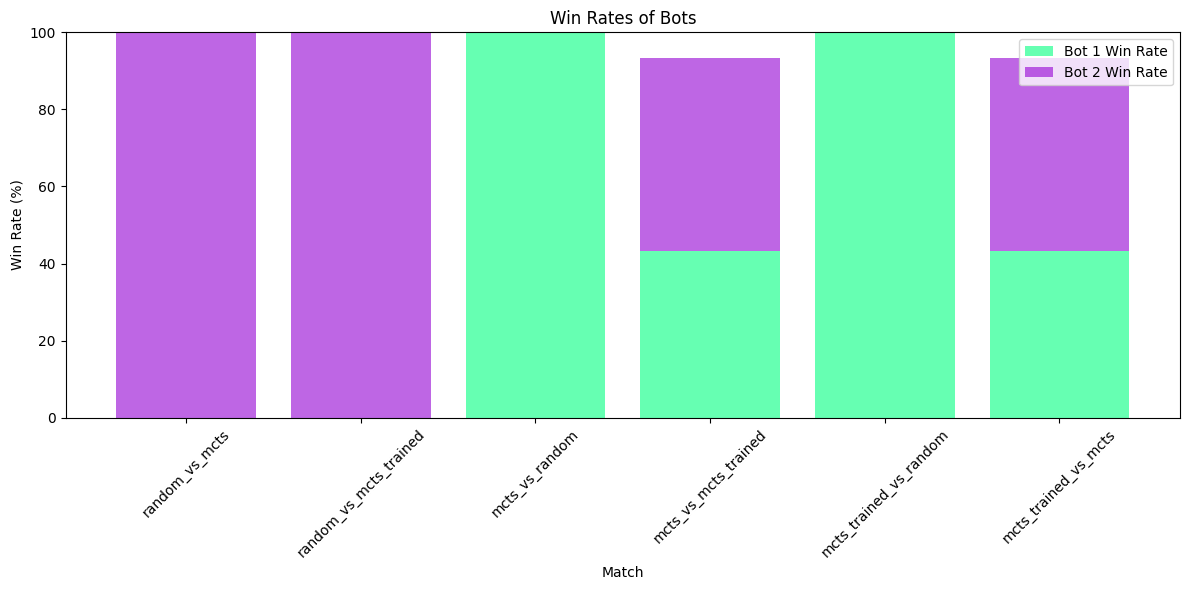

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['bot1_win_rate'] * 100, label='Bot 1 Win Rate', alpha=0.6, color='springgreen')
plt.bar(df.index, df['bot2_win_rate'] * 100, label='Bot 2 Win Rate', alpha=0.6, bottom=df['bot1_win_rate'] * 100, color='darkviolet')
plt.xlabel('Match')
plt.ylabel('Win Rate (%)')
plt.title('Win Rates of Bots')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('MCTS_Plots/win_rates.png')
plt.show()

2. Average Game Length (Avg. number of moves):

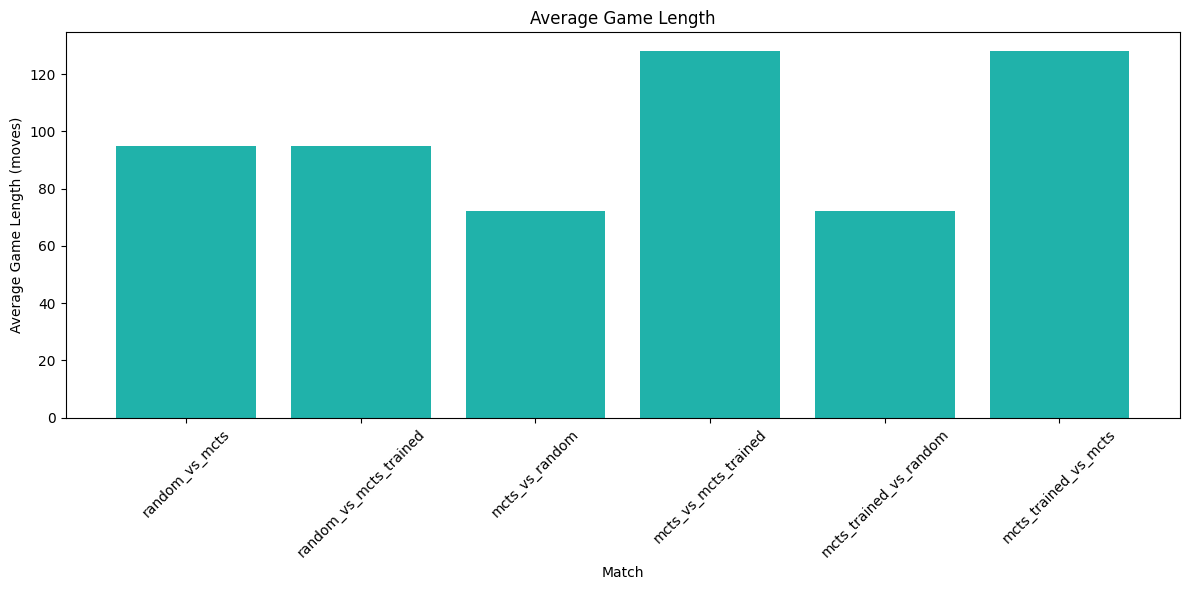

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['average_game_length (moves)'], color='lightseagreen')
plt.xlabel('Match')
plt.ylabel('Average Game Length (moves)')
plt.title('Average Game Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('MCTS_Plots/average_game_length.png')
plt.show()

3. Average time per game:

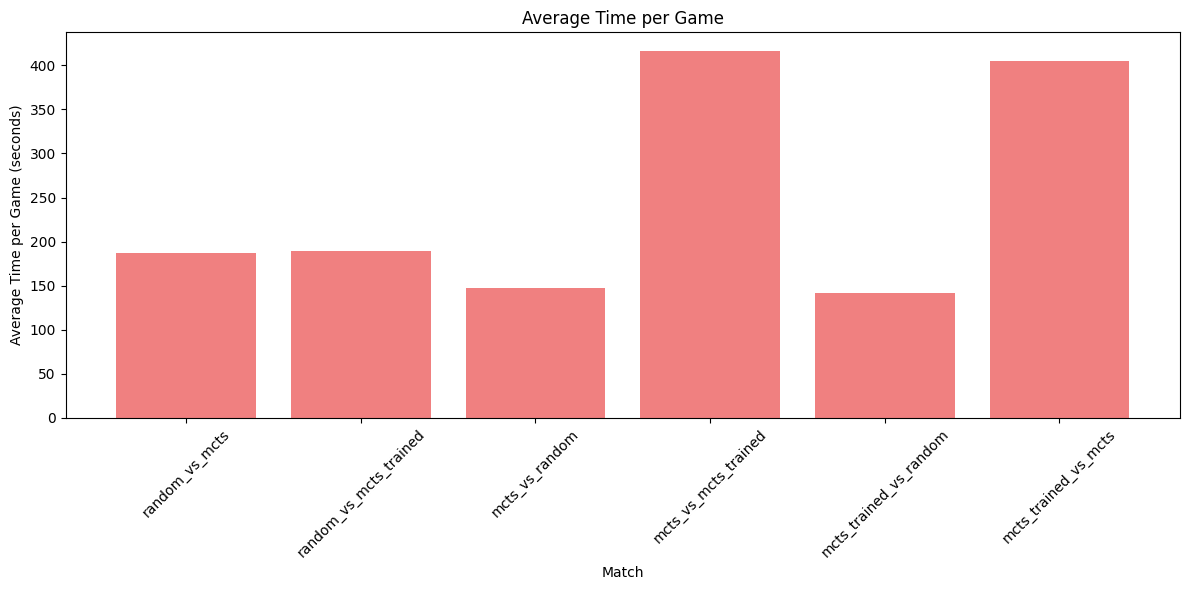

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['average_time_per_game'], color='lightcoral')
plt.xlabel('Match')
plt.ylabel('Average Time per Game (seconds)')
plt.title('Average Time per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('MCTS_Plots/average_time_per_game.png')
plt.show()

4. Average Moves times for `bot 1` and `bot 2`

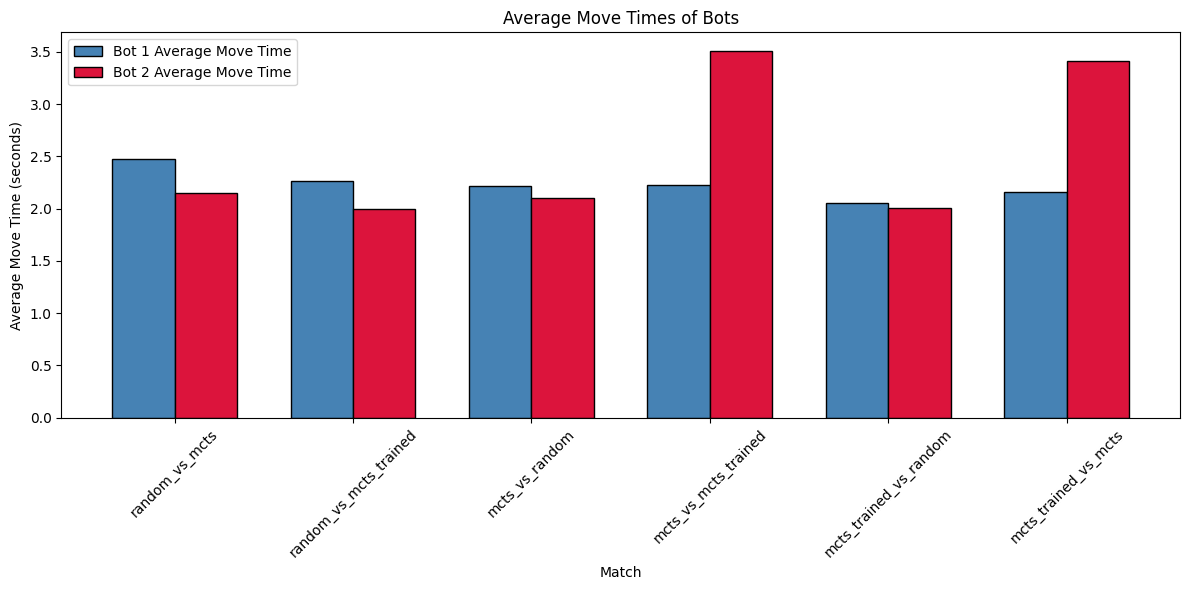

In [13]:
bar_width = 0.35

# Define the positions of the bars
r1 = range(len(df.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, df['average_move_time_bot_1'], color='steelblue', width=bar_width, edgecolor='black', label='Bot 1 Average Move Time')
plt.bar(r2, df['average_move_time_bot_2'], color='crimson', width=bar_width, edgecolor='black', label='Bot 2 Average Move Time')

plt.xlabel('Match')
plt.ylabel('Average Move Time (seconds)')
plt.title('Average Move Times of Bots')
plt.xticks([r + bar_width/2 for r in range(len(df.index))], df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('MCTS_Plots/average_move_time.png')
plt.show()

5. Final Elo Ratings:

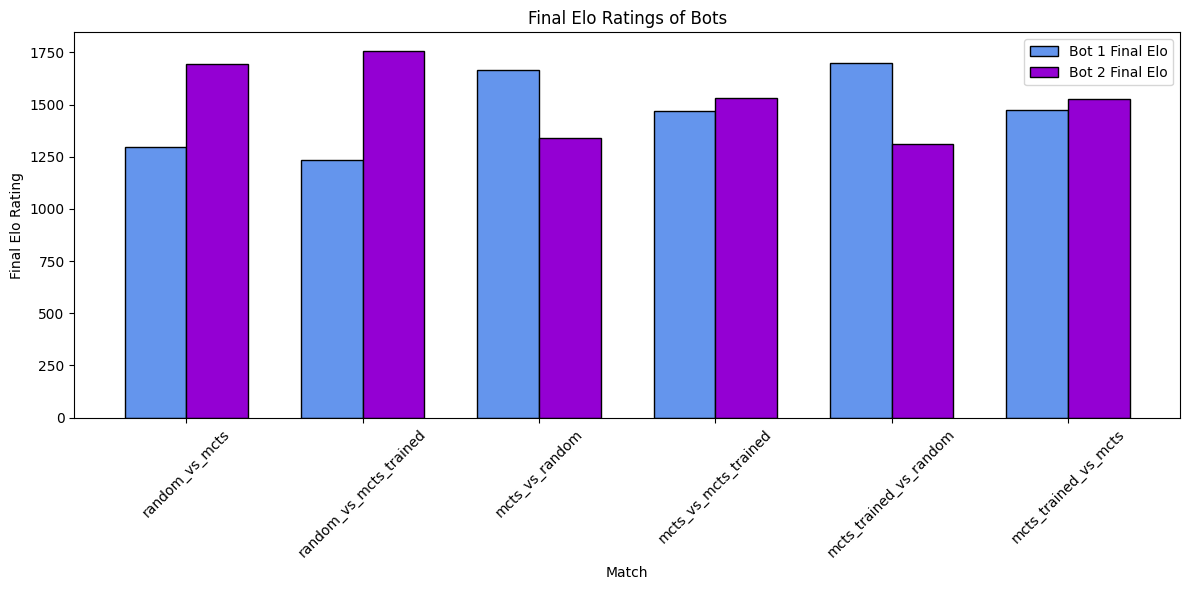

In [14]:
bar_width = 0.35

# Define the positions of the bars
r1 = range(len(df.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, df['final_elo_bot1'], color='cornflowerblue', width=bar_width, edgecolor='black', label='Bot 1 Final Elo')
plt.bar(r2, df['final_elo_bot2'], color='darkviolet', width=bar_width, edgecolor='black', label='Bot 2 Final Elo')

plt.xlabel('Match')
plt.ylabel('Final Elo Rating')
plt.title('Final Elo Ratings of Bots')
plt.xticks([r + bar_width/2 for r in range(len(df.index))], df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('MCTS_Plots/final_elo_ratings.png')
plt.show()

6. Summary of Statistics:

In [15]:
print("Summary Statistics:")
display(df[['bot1_win_rate', 'bot2_win_rate', 'average_game_length (moves)', 'average_time_per_game', 'average_move_time_bot_1', 'average_move_time_bot_2', 'final_elo_bot1', 'final_elo_bot2']])

Summary Statistics:


,bot1_win_rate,bot2_win_rate,average_game_length (moves),average_time_per_game,average_move_time_bot_1,average_move_time_bot_2,final_elo_bot1,final_elo_bot2
match,,,,,,,,
random_vs_mcts,0.000000,1.0,94.866667,186.916426,2.475725,2.150354,1297.377885,1695.910569
random_vs_mcts_trained,0.000000,1.0,94.866667,189.709522,2.268483,1.993717,1234.727660,1757.837539
mcts_vs_random,1.000000,0.0,72.266667,146.753250,2.213669,2.097687,1664.260010,1341.435621
mcts_vs_mcts_trained,0.433333,0.5,128.200000,416.722902,2.230083,3.511632,1468.694128,1529.889876
mcts_trained_vs_random,1.000000,0.0,72.266667,141.819371,2.055452,2.008166,1697.355507,1309.277439
mcts_trained_vs_mcts,0.433333,0.5,128.200000,404.447764,2.157901,3.410415,1472.428954,1526.660442
